In [1]:
import sys
sys.path.append("..")
from functions.functions import * 

In [2]:
file_path = './dataset/AB_NYC_2019.csv'

data = pd.read_csv('../dataset/AB_NYC_2019.csv')

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


(31227, 17)

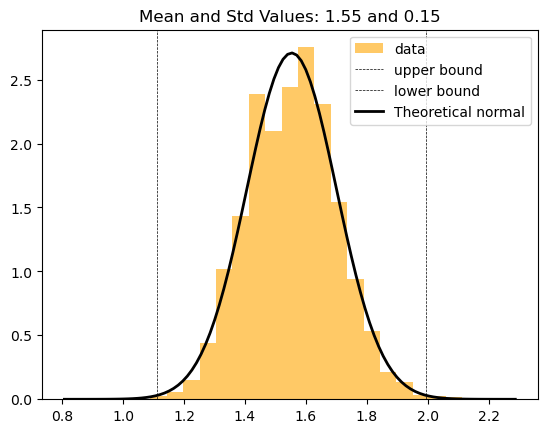

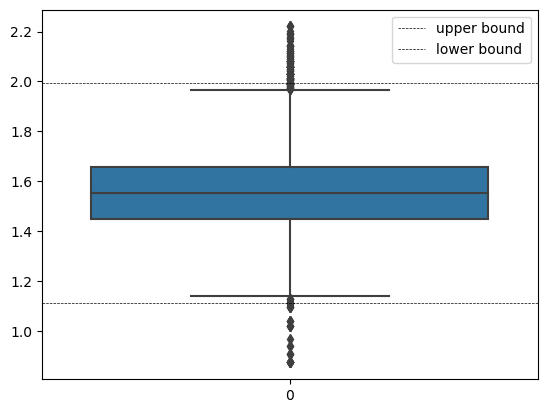

<Figure size 640x480 with 0 Axes>

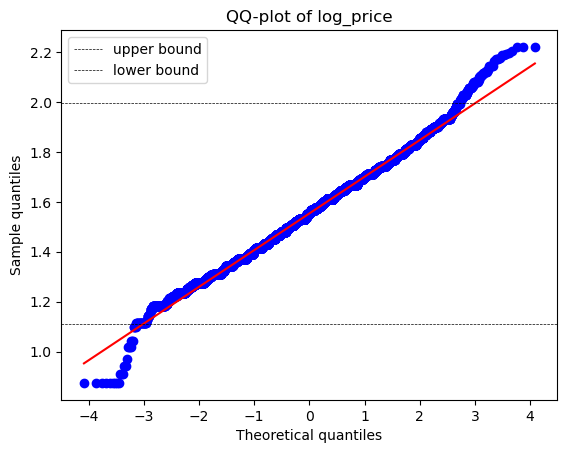

In [243]:
df = data.copy()

# Remove entries with no price
df = df[df['price']!=0]
df = df[df['availability_365']!=0]

# Replace NaN values by 0
df['number_of_reviews'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)
df['name'].fillna('Unnamed', inplace=True)
df['last_review'].fillna('2099-01-01',inplace=True)

#log price

# We will trim out the outliers using the log log price distribution
df['log_log_price'] = np.log(np.log(1+df['price']))

# We compute the upper and lower thresholds
u,l = compare_norm_dist(df['log_log_price'], True)

# We keep only the datapoints within the thresholds
df = df[(df['log_log_price']>l)&(df['log_log_price']<u)]

df.shape

# Preprocessing

In [244]:
X_train, X_test, y_train, y_test = preprocess(file_path)

# Feature Selection

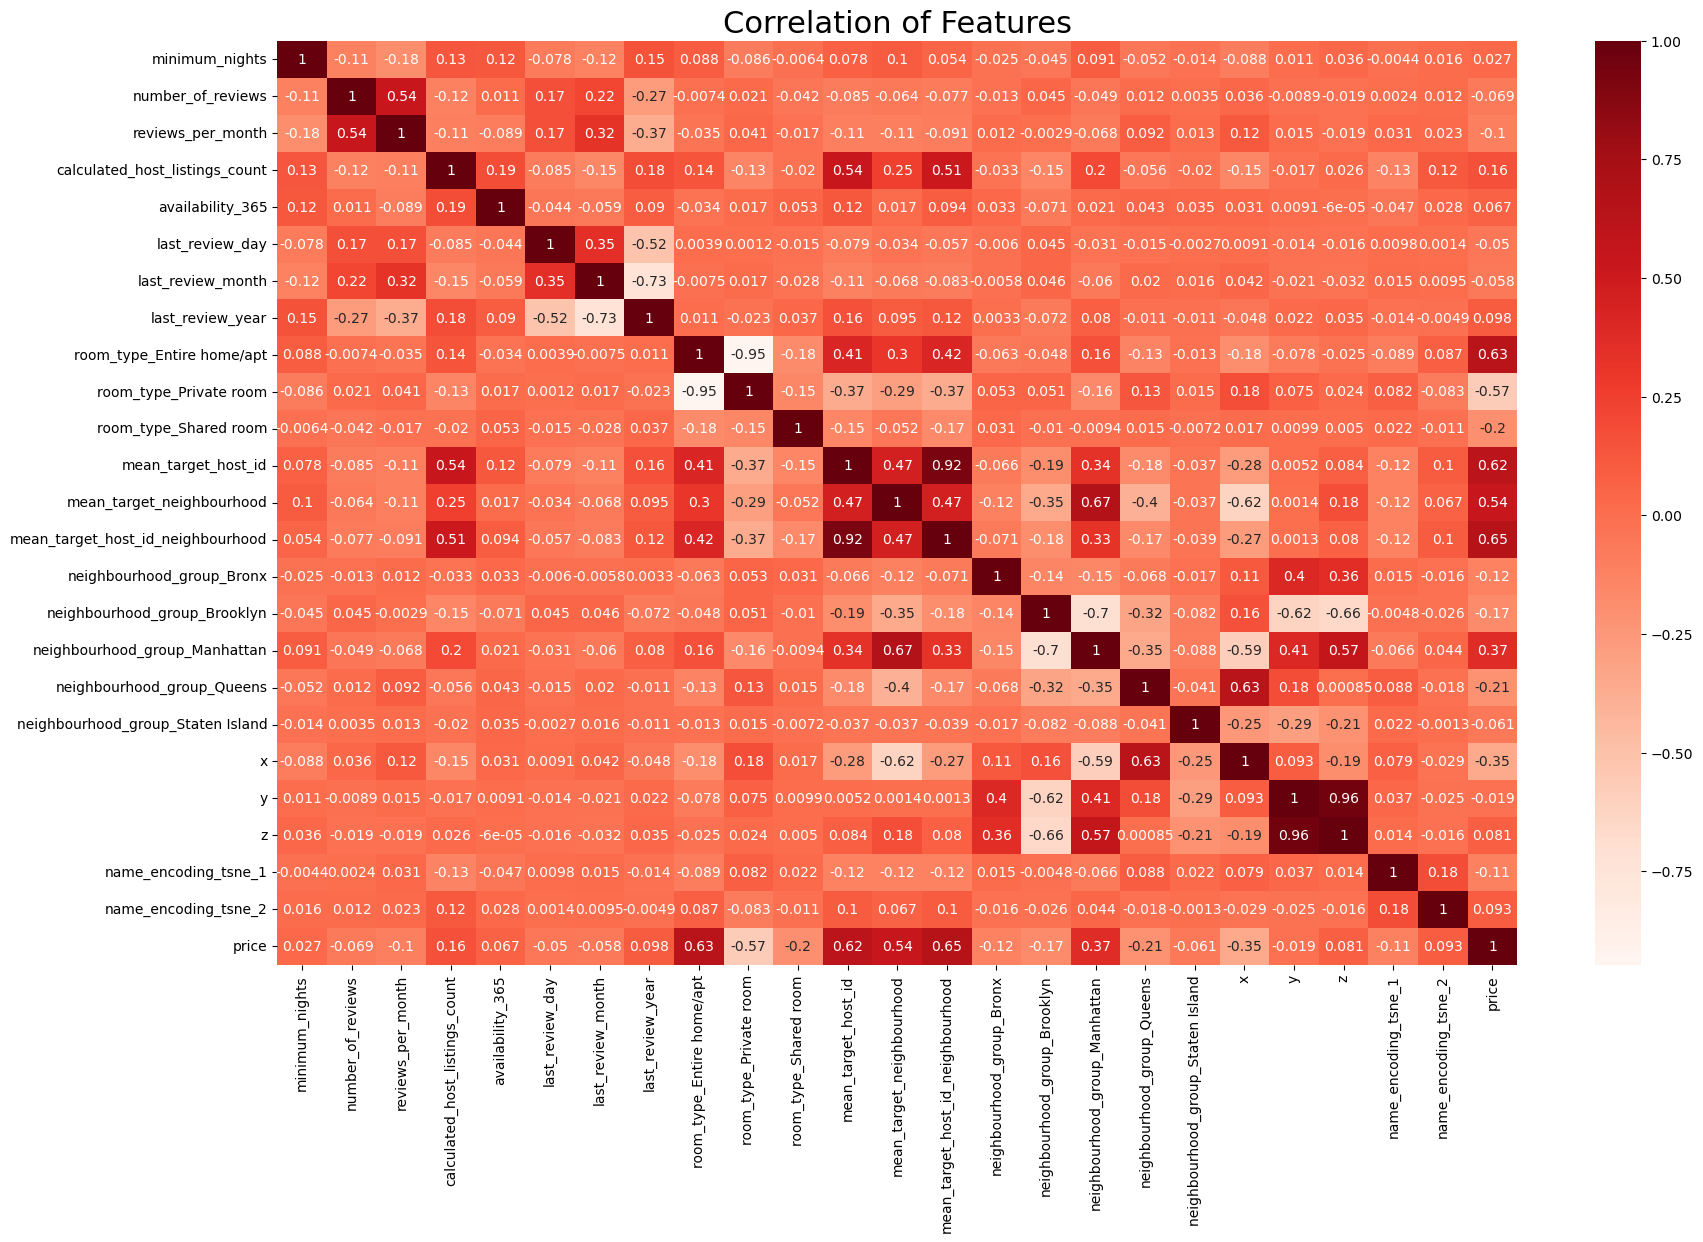

In [245]:
selected_features =list(X_train.columns)
# selected_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_review_day', 'last_review_month', 'last_review_year', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'mean_target_host_id','mean_target_neighbourhood','mean_target_host_id_neighbourhood','neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'x', 'y', 'z','name_encoding_tsne_1', 'name_encoding_tsne_2']

plt.figure(figsize=(20,12))
cor = X_train.copy()
cor = cor[selected_features]
cor['price']= y_train
cor=cor.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation of Features", fontsize = 22)
plt.show()

In [216]:
print(list(X_train.columns))

['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_review_day', 'last_review_month', 'last_review_year', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'x', 'y', 'z', 'name_encoding_PC_1', 'name_encoding_PC_2', 'name_encoding_PC_3', 'name_encoding_PC_4', 'name_encoding_PC_5', 'name_encoding_PC_6', 'name_encoding_PC_7', 'name_encoding_PC_8', 'name_encoding_PC_9', 'name_encoding_PC_10', 'name_encoding_PC_11', 'name_encoding_PC_12', 'name_encoding_PC_13', 'name_encoding_PC_14', 'name_encoding_PC_15', 'name_encoding_PC_16', 'name_encoding_PC_17', 'name_encoding_PC_18', 'name_encoding_PC_19', 'name_encoding_PC_20', 'name_encoding_tsne_1', 'name_encoding_tsne_2', 'mean_target_host_id', 'median_target_host_id', 'mean_target_neighbour

In [283]:
# Only keep columns of interest
#selected_features = list(X_train.columns)
selected_features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_review_day', 'last_review_month', 'last_review_year', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'mean_target_host_id','mean_target_neighbourhood','mean_target_host_id_neighbourhood','neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'x', 'y', 'z','name_encoding_tsne_1', 'name_encoding_tsne_2']

# Prepare feature matrices
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()

scaler = MinMaxScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()

X_test_selected.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day,last_review_month,last_review_year,room_type_Entire home/apt,room_type_Private room,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,x,y,z,name_encoding_tsne_1,name_encoding_tsne_2
4090,1,254,4.02,1,118,23,6,2019,0,1,...,0,0,1,0,0,0.209058,-0.727576,0.653398,19.680980,2.920167
1923,2,220,2.85,1,1,23,6,2019,0,1,...,0,0,1,0,0,0.208983,-0.727763,0.653213,32.059190,35.833050
11018,3,31,0.68,3,345,17,5,2019,0,1,...,0,0,1,0,0,0.209352,-0.727831,0.653019,1.808207,30.278666
12228,30,9,0.21,3,216,2,6,2019,1,0,...,0,1,0,0,0,0.209612,-0.729812,0.650720,32.480410,3.918869
2285,2,116,1.55,1,365,4,7,2019,1,0,...,0,1,0,0,0,0.210213,-0.728490,0.652006,-61.887770,-2.074867


# Decision Trees

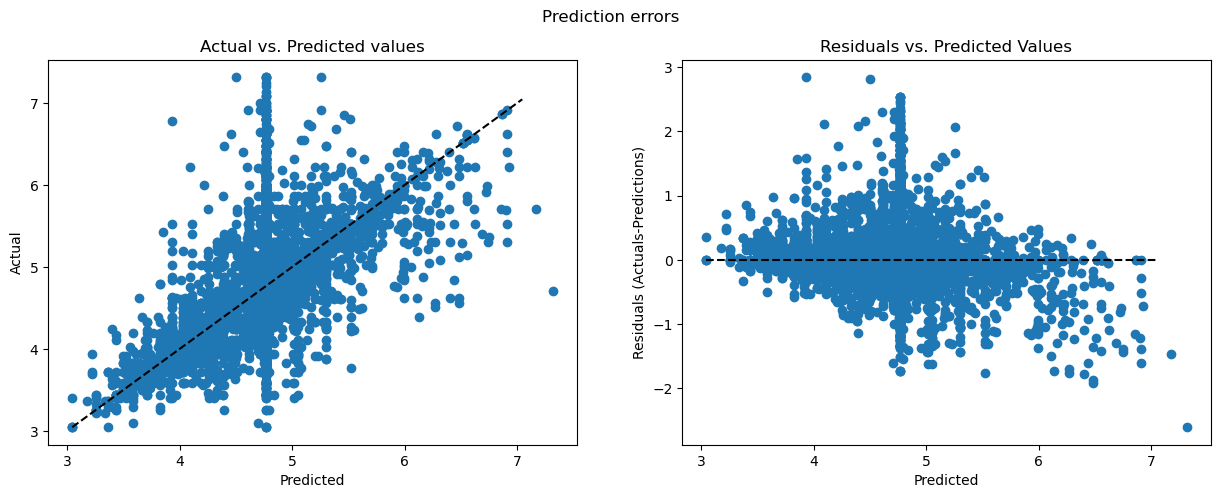

R²: 0.2906045734346785
MAE: 0.42801003171986546
MSE: 0.343718292580232
RMSE: 0.5862749291759217
MAPE: 0.0882907230508092
error_ratio_rmse: 0.1225753432500939
error_ratio_mae: 0.08948613345327534


In [284]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_np, y_train_np)
y_pred_dt_reg = dt_reg.predict(X_test_np)
dt_reg_scores = scores(y_test_np,y_pred_dt_reg,plot=True)

# Bagging

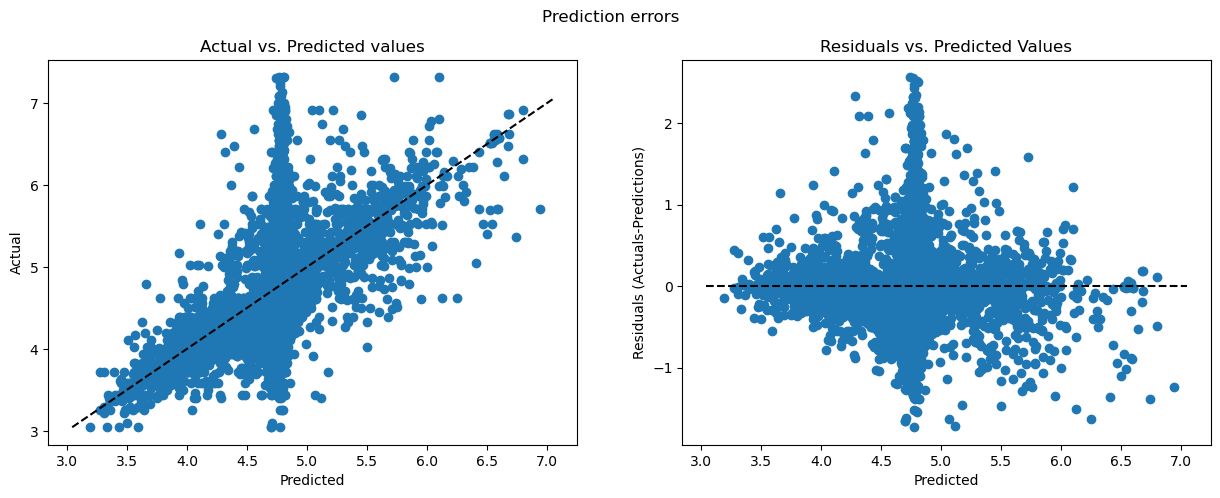

R²: 0.35010142944892086
MAE: 0.41062058770785065
MSE: 0.31489070644520323
RMSE: 0.5611512331316784
MAPE: 0.08471528698109518
error_ratio_rmse: 0.1173226102521763
error_ratio_mae: 0.0858504380437904


In [267]:
bag = BaggingRegressor().fit(X_train_np, y_train_np)
y_pred_bag = bag.predict(X_test_np)
bag_scores=scores(y_test_np,y_pred_bag,plot=True)

# Random Forest

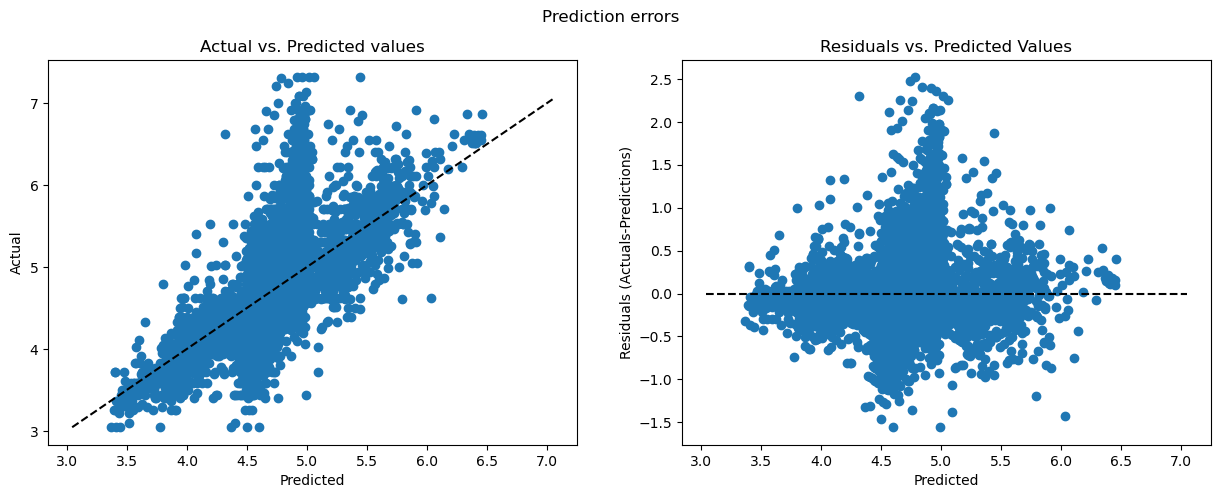

R²: 0.4992493263101222
MAE: 0.35759323830654416
MSE: 0.24262514265481674
RMSE: 0.492569936815897
MAPE: 0.07331893260157511
error_ratio_rmse: 0.10298398596841332
error_ratio_mae: 0.07476375288799822


In [268]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 12, random_state = 18).fit(X_train_np, y_train_np)
y_pred_random_forest = rf.predict(X_test_np)
random_forest_scores=scores(y_test_np,y_pred_random_forest,plot=True)

# ADABOOST

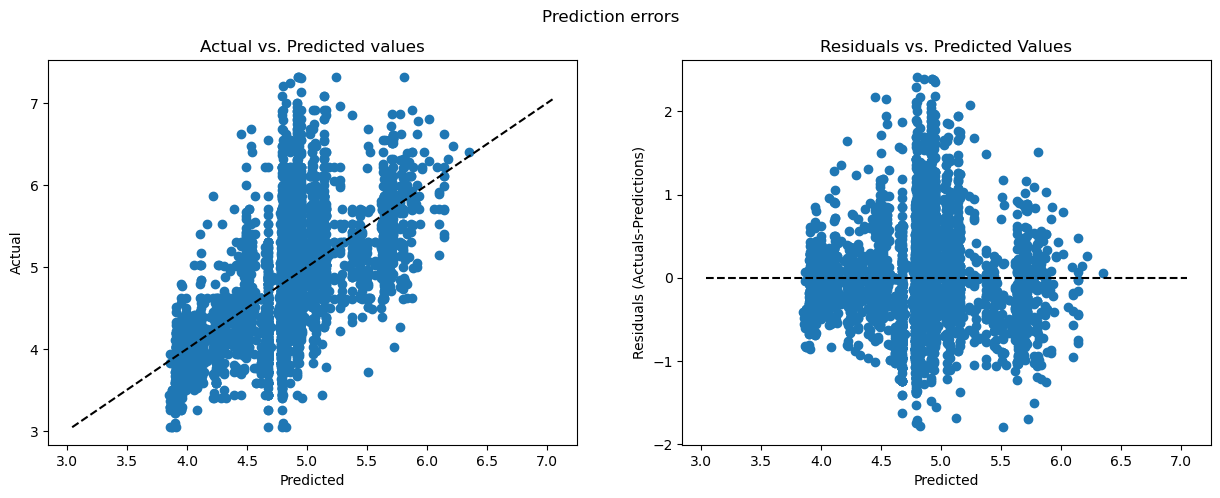

R²: 0.3817666800651701
MAE: 0.4204401896599775
MSE: 0.29954816902761794
RMSE: 0.5473099387254153
MAPE: 0.08842977778693466
error_ratio_rmse: 0.1144287436915542
error_ratio_mae: 0.08790346985525316


In [269]:
ada = AdaBoostRegressor().fit(X_train_np, y_train_np)
y_pred_ada = ada.predict(X_test_np)
ada_scores=scores(y_test_np,y_pred_ada,plot= True)

# Gradient Boosting

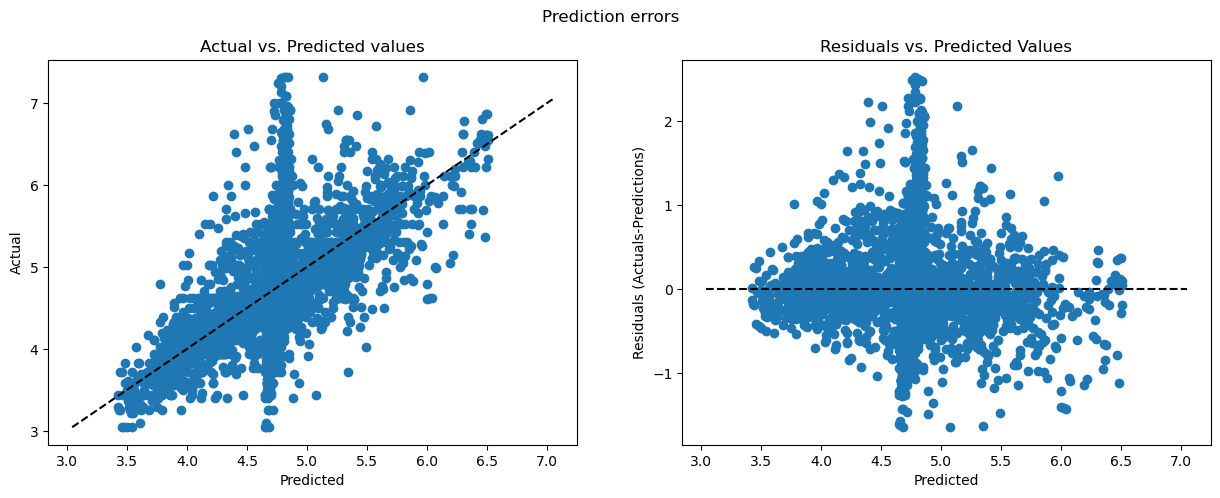

R²: 0.37904141754439225
MAE: 0.40450344286567086
MSE: 0.3008686209862808
RMSE: 0.5485149232120132
MAPE: 0.08334343856239138
error_ratio_rmse: 0.11468067564311042
error_ratio_mae: 0.08457149689958239


In [270]:
gbr = GradientBoostingRegressor().fit(X_train_np, y_train_np)
y_pred_gbr = gbr.predict(X_test_np)
gbr_scores=scores(y_test_np,y_pred_gbr,plot= True)

# Hist Gradient Boosting

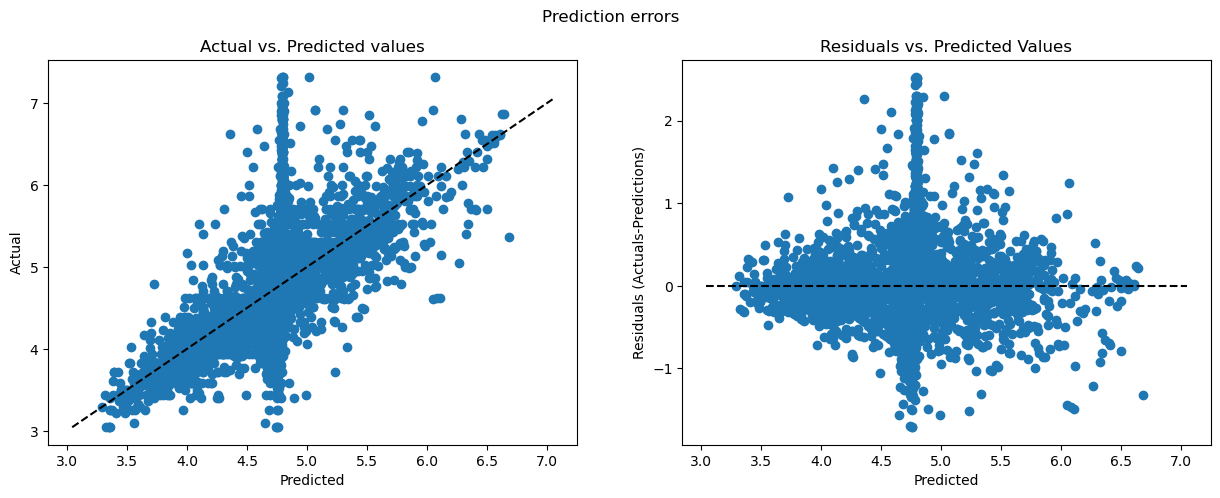

R²: 0.36753375832856927
MAE: 0.4067551135032561
MSE: 0.30644434480565846
RMSE: 0.5535741547486285
MAPE: 0.08408308640618149
error_ratio_rmse: 0.11573843372096988
error_ratio_mae: 0.08504226460182085


In [271]:
hgbr = HistGradientBoostingRegressor().fit(X_train_np, y_train_np)
y_pred_hgbr = hgbr.predict(X_test_np)
hgbr_scores=scores(y_test_np,y_pred_hgbr,plot= True)

# Light GBM

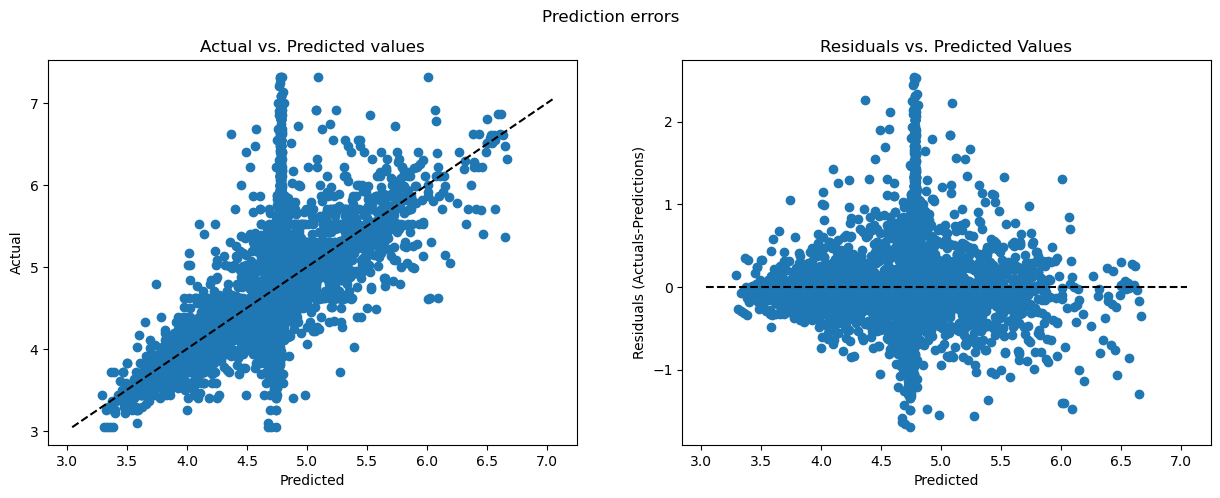

R²: 0.365701991241556
MAE: 0.40731388312380834
MSE: 0.30733187781189913
RMSE: 0.5543752139227539
MAPE: 0.08403121548912725
error_ratio_rmse: 0.11590591504815212
error_ratio_mae: 0.0851590892767787


In [272]:
lgbm = LGBMRegressor().fit(X_train_np, y_train_np)
y_pred_lgbm = lgbm.predict(X_test_np)
lgbm_scores=scores(y_test_np,y_pred_lgbm,plot= True)

# XGBOOST

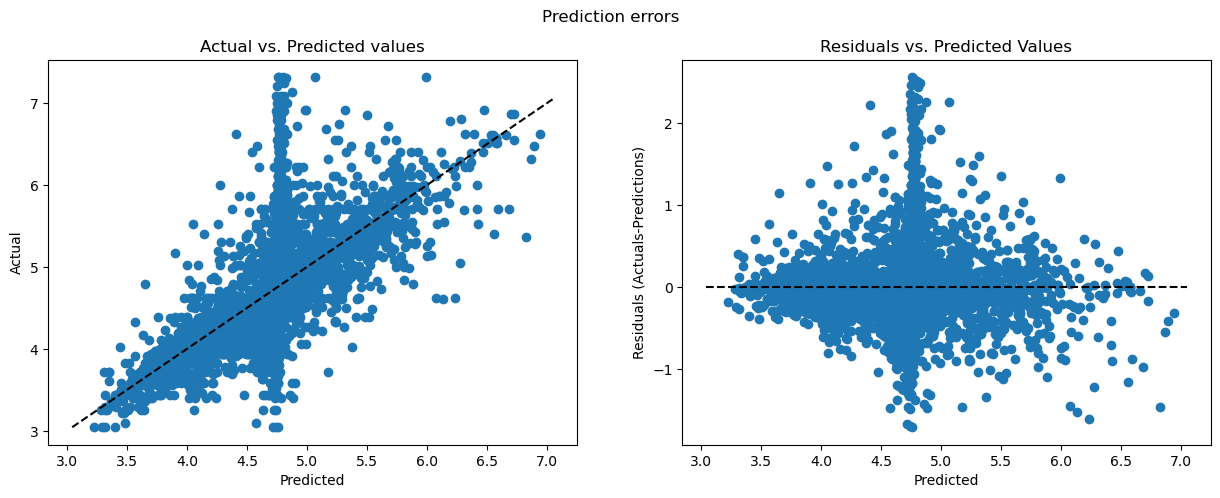

R²: 0.3654795677509076
MAE: 0.40597993823571155
MSE: 0.30743964707509486
RMSE: 0.5544724042502881
MAPE: 0.0836309946878934
error_ratio_rmse: 0.11592623510136477
error_ratio_mae: 0.08488019494854092


In [273]:
xgb = xg.XGBRegressor(objective = 'reg:squarederror', eval_metric = 'rmse').fit(X_train_np, y_train_np)
y_pred_xgb = xgb.predict(X_test_np)
xgb_scores=scores(y_test_np,y_pred_xgb,plot= True)

In [257]:
space={'max_depth': hp.quniform("max_depth", 3, 40, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,280,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,150),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 400, 1),
        'seed': hp.quniform('seed', 0, 400, 1)
    }

In [258]:
def objective(space):
    mod=xg.XGBRegressor(
                          n_estimators =int(space['n_estimators']), 
                          max_depth = int(space['max_depth']), 
                          gamma = space['gamma'],
                          reg_alpha = space['reg_alpha'],
                          reg_lambda = space['reg_lambda'],
                          min_child_weight=int(space['min_child_weight']),
                          colsample_bytree=space['colsample_bytree'],
                          seed = int(space['seed']),
                          objective = 'reg:squarederror', 
                          eval_metric = 'rmse'
                       )
    
    evaluation = [( X_train_np, y_train_np), ( X_test_np, y_test_np)]
    
    mod.set_params(eval_metric="rmse",early_stopping_rounds=10,)
    mod.fit(X_train_np, y_train_np,eval_set=evaluation,verbose=False)

    y_pred = mod.predict(X_test_np)
    score = scores(y_test_np,y_pred)['RMSE']
    print ("SCORE:", score)
    return {'loss': score, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

R²: 0.4582134328736599                                                                                                 
MAE: 0.3848714465097877                                                                                                
MSE: 0.26250797062112646                                                                                               
RMSE: 0.5123553167686722                                                                                               
MAPE: 0.08001903461545518                                                                                              
error_ratio_rmse: 0.10712061132685026                                                                                  
error_ratio_mae: 0.08046694019375591                                                                                   
SCORE:                                                                                                                 
0.5123553167686722                      

MAE: 0.3767233441207594                                                                                                
MSE: 0.2538515708992979                                                                                                
RMSE: 0.5038368494853248                                                                                               
MAPE: 0.07822262825799947                                                                                              
error_ratio_rmse: 0.10533961405192213                                                                                  
error_ratio_mae: 0.078763376903789                                                                                     
SCORE:                                                                                                                 
0.5038368494853248                                                                                                     
R²: 0.3955202585727865                  

MSE: 0.23817406487997933                                                                                               
RMSE: 0.48803080320813697                                                                                              
MAPE: 0.0767639118963416                                                                                               
error_ratio_rmse: 0.10203496728734625                                                                                  
error_ratio_mae: 0.07679595996924919                                                                                   
SCORE:                                                                                                                 
0.48803080320813697                                                                                                    
R²: 0.545474926629465                                                                                                  
MAE: 0.3419737468729605                 

RMSE: 0.5360321959432921                                                                                               
MAPE: 0.08365791913224511                                                                                              
error_ratio_rmse: 0.1120708513038512                                                                                   
error_ratio_mae: 0.08415343438416366                                                                                   
SCORE:                                                                                                                 
0.5360321959432921                                                                                                     
R²: 0.4051340502400542                                                                                                 
MAE: 0.40443288786723747                                                                                               
MSE: 0.28822614427551474                

MAPE: 0.08988508545628943                                                                                              
error_ratio_rmse: 0.11865281485080367                                                                                  
error_ratio_mae: 0.08984715001954277                                                                                   
SCORE:                                                                                                                 
0.5675135698477874                                                                                                     
R²: 0.5101276075208373                                                                                                 
MAE: 0.3619952421324925                                                                                                
MSE: 0.23735436685906905                                                                                               
RMSE: 0.48719027787823216               

error_ratio_rmse: 0.10770961916986432                                                                                  
error_ratio_mae: 0.08077127434327054                                                                                   
SCORE:                                                                                                                 
0.5151725271658935                                                                                                     
R²: 0.4368378179865805                                                                                                 
MAE: 0.3918462556120309                                                                                                
MSE: 0.27286494442826303                                                                                               
RMSE: 0.5223647618554137                                                                                               
MAPE: 0.08128946222440052               

error_ratio_mae: 0.08264699648675157                                                                                   
SCORE:                                                                                                                 
0.5185989568603967                                                                                                     
R²: 0.43102934926085223                                                                                                
MAE: 0.384982429297419                                                                                                 
MSE: 0.2756792802389397                                                                                                
RMSE: 0.5250516929207444                                                                                               
MAPE: 0.07820999439978472                                                                                              
error_ratio_rmse: 0.10977510427448503   

In [259]:
best_hyperparams

{'colsample_bytree': 0.5492781194912929,
 'gamma': 5.631949367643904,
 'max_depth': 25.0,
 'min_child_weight': 1.0,
 'n_estimators': 102.0,
 'reg_alpha': 280.0,
 'reg_lambda': 143.96997232898997,
 'seed': 52.0}

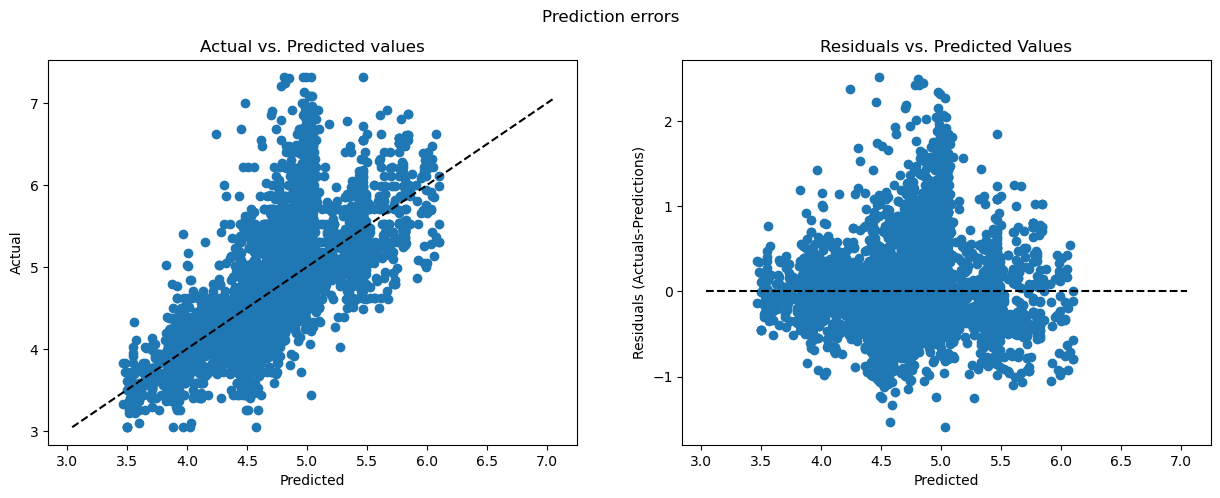

R²: 0.49879294691054366
MAE: 0.3650922224176712
MSE: 0.24284626890136082
RMSE: 0.49279434747302125
MAPE: 0.07477965309707407
error_ratio_rmse: 0.10303090459303307
error_ratio_mae: 0.07633160187096673


In [260]:
xgb_tuned = xg.XGBRegressor(
                          n_estimators =int(best_hyperparams['n_estimators']), 
                          max_depth = int(best_hyperparams['max_depth']), 
                          gamma = best_hyperparams['gamma'],
                          reg_alpha = best_hyperparams['reg_alpha'],
                          reg_lambda = best_hyperparams['reg_lambda'],
                          min_child_weight=int(best_hyperparams['min_child_weight']),
                          colsample_bytree=best_hyperparams['colsample_bytree'],
                          seed = int(best_hyperparams['seed']),
                          objective = 'reg:squarederror',
                          eval_metric = 'rmse'
                       )

xgb_tuned.fit(X_train_np, y_train_np)#,eval_set=evaluation, eval_metric="rmse",early_stopping_rounds=10,verbose=False)

y_pred = xgb_tuned.predict(X_test_np)
score = scores(y_test_np,y_pred,plot=True)